#### 1 - Identifique e elimine preditoras correlacionadas. Mostre os coeficientes antes e depois da eliminação. Antes da eliminação não precisa utilizar todas as variáveis da base de dados.

In [260]:
def more_correlated(data, min, max):
    corr = data.corr()
    matrix = pd.DataFrame()
    dic = {}

    for column in corr:    
        for line in corr.columns:
            value = corr[column][line]

            if((value < min and value > -1) or (value > max and value < 1)):    
                dic[line] = value
        
        
        if(len(dic) > 0):
            df = pd.DataFrame({column:dic})
            matrix = pd.concat([matrix, df])
            dic.clear()
        
    return matrix

In [261]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("train.csv")
data = data.drop(["Id"], axis=1)

In [262]:
matrix = more_correlated(data, -0.7, 0.7)

<AxesSubplot:>

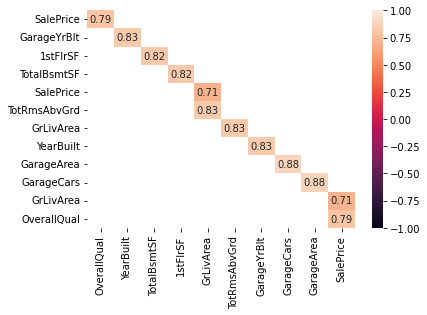

In [263]:
sns.heatmap(matrix, vmin=-1, vmax=1, annot=True)

In [264]:
#preenchedo valores ausentes e retirando valores categoricos
medians = {}

for i in data:
    if(data[i].dtype != "object"):
        if(data[i].isnull().any()):
            medians[i] = data[i].median()

data = data.fillna(value=medians)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [265]:
cat = []

for colum in data.columns:
    if data[colum].dtype == "object":
        cat.append(colum)

x = data.drop(cat, axis=1)
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [266]:
from sklearn.linear_model import LinearRegression

x = x.drop(["SalePrice"], axis=1)
sp = data["SalePrice"]

model = LinearRegression()
model.fit(x, sp) 
pd.DataFrame([model.coef_], columns=x.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-181.707658,-54.436841,0.429697,17332.932067,4673.50063,269.173074,134.593961,31.344509,10.014123,-0.923268,...,-4.409578,23.892052,-2.891123,11.908984,20.315588,55.98664,-29.185467,-0.733568,-48.395143,-780.746618


<p>Excluindo preditoras correlacionadas

In [267]:
x = x.drop(["GarageCars", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"], axis=1) 

In [268]:
x["SalePrice"] = data["SalePrice"]
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [269]:
matrix_after = more_correlated(x, -0.7, 0.7)

<AxesSubplot:>

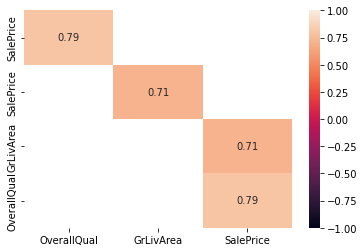

In [270]:
sns.heatmap(matrix_after, vmin=-1, vmax=1, annot=True)

In [271]:
model.fit(x, sp)
pd.DataFrame([model.coef_], columns=x.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-2.130550e-13,-3.174128e-13,-3.194641e-16,1.430136e-11,4.169676e-12,4.420828e-13,1.504819e-13,-2.720608e-14,-7.398296e-15,1.070119e-14,...,1.203940e-14,-3.567400e-14,-6.109638e-15,7.593439e-14,-1.957371e-15,-3.237792e-14,-1.151841e-15,-3.289143e-14,-1.020490e-12,1.0


#### 2 - Encontre uma variável de confundimento e demonstre através dos coeficientes os efeitos de utilizar ou não esta variável na regressão.

In [272]:
train = data.drop(["SalePrice"], axis=1)
train = train.drop(cat, axis=1)
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [273]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train, sp)
df = pd.DataFrame([model.coef_], columns=train.columns)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-181.707658,-54.436841,0.429697,17332.932067,4673.50063,269.173074,134.593961,31.344509,10.014123,-0.923268,...,-4.409578,23.892052,-2.891123,11.908984,20.315588,55.98664,-29.185467,-0.733568,-48.395143,-780.746618


In [274]:
#Pés quadrados do segundo andar (quando maior o segundo andar, mais cara deveria ser a casa, mas neste caso, o preço da casa está diminuindo)
df['2ndFlrSF']

0    18.187846
Name: 2ndFlrSF, dtype: float64

In [275]:
train["MSZoning"] = data["MSZoning"]
train["MSZoning"]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [276]:
train = pd.get_dummies(train, columns=['MSZoning'] , drop_first=True)
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,2,2008,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,5,2007,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,9,2008,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,2,2006,0,0,1,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,12,2008,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,8,2007,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,2,2010,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,2500,5,2010,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,0,4,2010,0,0,1,0


In [277]:
model.fit(train, sp)
df = pd.DataFrame([model.coef_], columns=train.columns)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,-168.613931,-69.905904,0.413582,17249.67751,4623.963438,220.589851,140.263295,32.318239,10.294298,-0.964352,...,20.485142,55.21182,-28.517856,-0.782698,-29.412997,-786.428161,17455.795749,12589.795352,12749.678954,4771.099014


In [278]:
#Pés quadrados do segundo andar (agora, quando maior o segundo andar, mais cara é a casa)
df['2ndFlrSF']

0    18.76077
Name: 2ndFlrSF, dtype: float64

#### 3 - Encontre um par de variáveis que apresentam interações. Mostre os coeficientes do modelo treinado com interações.

In [279]:
for i in df:
    print(i, " -> ", df[i])

MSSubClass  ->  0   -168.613931
Name: MSSubClass, dtype: float64
LotFrontage  ->  0   -69.905904
Name: LotFrontage, dtype: float64
LotArea  ->  0    0.413582
Name: LotArea, dtype: float64
OverallQual  ->  0    17249.67751
Name: OverallQual, dtype: float64
OverallCond  ->  0    4623.963438
Name: OverallCond, dtype: float64
YearBuilt  ->  0    220.589851
Name: YearBuilt, dtype: float64
YearRemodAdd  ->  0    140.263295
Name: YearRemodAdd, dtype: float64
MasVnrArea  ->  0    32.318239
Name: MasVnrArea, dtype: float64
BsmtFinSF1  ->  0    10.294298
Name: BsmtFinSF1, dtype: float64
BsmtFinSF2  ->  0   -0.964352
Name: BsmtFinSF2, dtype: float64
BsmtUnfSF  ->  0    0.492093
Name: BsmtUnfSF, dtype: float64
TotalBsmtSF  ->  0    9.822039
Name: TotalBsmtSF, dtype: float64
1stFlrSF  ->  0    17.290297
Name: 1stFlrSF, dtype: float64
2ndFlrSF  ->  0    18.76077
Name: 2ndFlrSF, dtype: float64
LowQualFinSF  ->  0   -4.845709
Name: LowQualFinSF, dtype: float64
GrLivArea  ->  0    31.205357
Name: GrLiv

In [280]:

train.rename(columns = {'2ndFlrSF':'SecondFlrSF', '3SsnPorch':'ThirdSsnPorch', '1stFlrSF':'FirstFlrSF'}, inplace = True)
train.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM'],
      dtype='object')

In [281]:
train_collumns = ""

for i in train.columns:
    train_collumns = train_collumns + " + "+ i 

train_collumns

' + MSSubClass + LotFrontage + LotArea + OverallQual + OverallCond + YearBuilt + YearRemodAdd + MasVnrArea + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + TotalBsmtSF + FirstFlrSF + SecondFlrSF + LowQualFinSF + GrLivArea + BsmtFullBath + BsmtHalfBath + FullBath + HalfBath + BedroomAbvGr + KitchenAbvGr + TotRmsAbvGrd + Fireplaces + GarageYrBlt + GarageCars + GarageArea + WoodDeckSF + OpenPorchSF + EnclosedPorch + ThirdSsnPorch + ScreenPorch + PoolArea + MiscVal + MoSold + YrSold + MSZoning_FV + MSZoning_RH + MSZoning_RL + MSZoning_RM'

In [282]:
train["SalePrice"] = data["SalePrice"]
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,2,2008,0,0,1,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,5,2007,0,0,1,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,9,2008,0,0,1,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,2,2006,0,0,1,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,12,2008,0,0,1,0,250000


In [283]:
import statsmodels.formula.api as sm

inter_model = sm.ols(formula='SalePrice ~ BedroomAbvGr*GrLivArea'+train_collumns, data=train)

In [284]:
result = inter_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     163.3
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:21:18   Log-Likelihood:                -17301.
No. Observations:                1460   AIC:                         3.468e+04
Df Residuals:                    1420   BIC:                         3.489e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.973e+05    1.4e+06      0.355      0.723   -2.25e+06    3.25e+06
BedroomAbvGr           -2.612e+04   3442.597     -7.588      0.000   -3.29e+04   -1.94e+04
GrLivArea                  1.1211      8.108      0.138      0.890     -14.785      17.027
BedroomAbvGr:GrLivArea    10.0106      1.933      5.178      0.000       6.218      13.803
MSSubClass              -173.8964     28.189     -6.169      0.000    -229.194    -118.599
LotFrontage              -67.3188     51.784     -1.300      0.194    -168.899      34.262
LotArea                    0.4293      0.101      4.239      0.000       0.231       0.628
OverallQual               1.8e+04   1192.993     15.091      0.000    1.57e+04    2.03e+04
OverallCond             4442.8293   1029.974      4.314      0.000    2422.395    6463.264
YearBuilt                210.2041     68.876      3.052      0.002      75.094     345.314
YearRemodAdd             150.8111     68.201      2.211      0.027      17.026     284.596
MasVnrArea                30.9845      5.888      5.262      0.000      19.434      42.535
BsmtFinSF1                10.8342      2.510      4.317      0.000       5.911      15.757
BsmtFinSF2                -0.4948      4.461     -0.111      0.912      -9.246       8.257
BsmtUnfSF                 -0.0443      2.391     -0.019      0.985      -4.735       4.647
TotalBsmtSF               10.2951      3.339      3.083      0.002       3.746      16.845
FirstFlrSF                13.7501      6.199      2.218      0.027       1.591      25.909
SecondFlrSF               11.9945      5.820      2.061      0.040       0.577      23.412
LowQualFinSF             -24.6234     15.322     -1.607      0.108     -54.680       5.434
BsmtFullBath            7993.3627   2598.323      3.076      0.002    2896.399    1.31e+04
BsmtHalfBath            1144.8892   4062.124      0.282      0.778   -6823.520    9113.298
FullBath                3615.3947   2839.537      1.273      0.203   -1954.743    9185.532
HalfBath                -779.9745   2698.147     -0.289      0.773   -6072.756    4512.807
KitchenAbvGr           -1.365e+04   5184.098     -2.633      0.009   -2.38e+04   -3482.399
TotRmsAbvGrd            5652.2798   1234.935      4.577      0.000    3229.786    8074.774
Fireplaces              3998.1899   1769.930      2.259      0.024     526.232    7470.148
GarageYrBlt              122.8665     68.354      1.798      0.072     -11.219     256.952
GarageCars              1.114e+04   2868.459      3.884      0.000    5513.865    1.68e+04
GarageArea                -2.5944      9.937     -0.261      0.794     -22.088      16.899
WoodDeckSF                24.1129      7.968      3.026      0.003       8.483      39.742
OpenPorchSF               -1.9326     15.256     -0.127      0.899     -31.859  

#### 4 - Mostre os coeficientes do modelo treinado antes e depois da remoção de valores influentes.


In [285]:
#Coeficientes antes da remoção de valores influentes
model = LinearRegression()
model.fit(x, sp)
pd.DataFrame([model.coef_], columns=x.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-2.130550e-13,-3.174128e-13,-3.194641e-16,1.430136e-11,4.169676e-12,4.420828e-13,1.504819e-13,-2.720608e-14,-7.398296e-15,1.070119e-14,...,1.203940e-14,-3.567400e-14,-6.109638e-15,7.593439e-14,-1.957371e-15,-3.237792e-14,-1.151841e-15,-3.289143e-14,-1.020490e-12,1.0


In [286]:
#detectando outliers com knn
from pyod.models.knn import KNN

knn = KNN()
knn.fit(x)
knn.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [287]:
#Detectando os indices dos exemplos que são outliers
out = []

for i in range(len(knn.labels_)):
    if knn.labels_[i] == 1:
        out.append(i)

In [288]:
#removendo os outliers
x = x.drop(out)
sp_2 = sp.drop(out)

In [289]:
x

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [290]:
model = LinearRegression()
model.fit(x, sp_2)
pd.DataFrame([model.coef_], columns=x.columns)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.784935e-13,6.763479e-13,5.085364e-16,1.082040e-11,-1.636760e-12,-9.483510e-14,3.606767e-13,-1.702664e-14,1.453919e-14,-8.226625e-15,...,9.422812e-15,2.335313e-14,-3.638349e-15,-5.145231e-14,2.853496e-14,3.316444e-15,-5.996167e-15,3.223916e-13,-3.655354e-13,1.0


#### 5 - Mostre se existe ou não heterocedasticidade no seu modelo de regressão linear multivariado.

In [291]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(result)

c:\Users\yrese\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'abs(residual)')

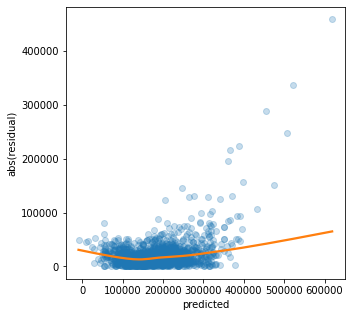

In [292]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(result.fittedvalues, np.abs(result.resid), scatter_kws={'alpha':0.25}, line_kws={'color':'C1'}, lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

#### 6 - Interprete os gráficos residuais parciais no seu modelo de regressão linear multiváriado 

c:\Users\yrese\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


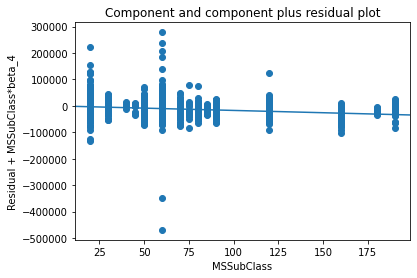

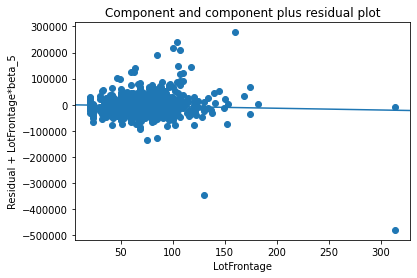

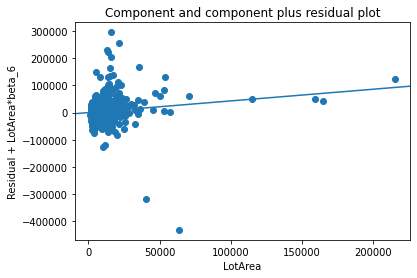

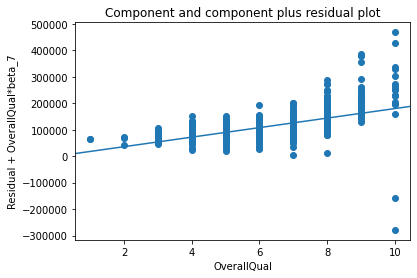

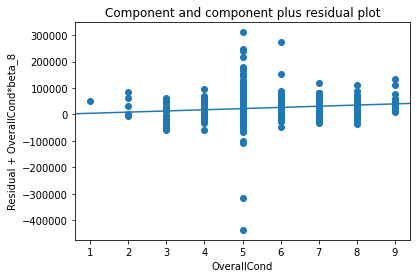

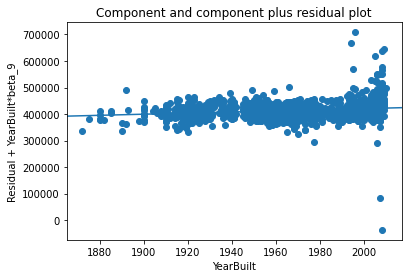

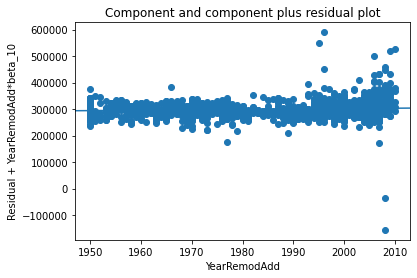

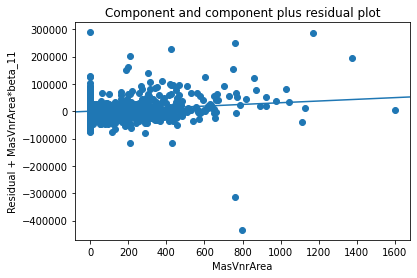

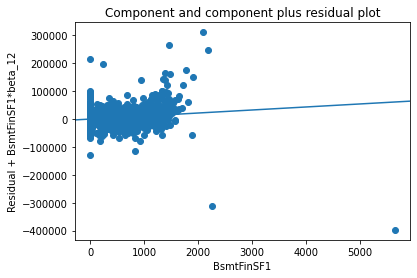

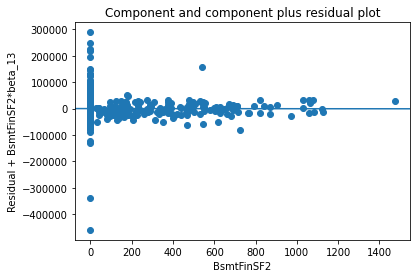

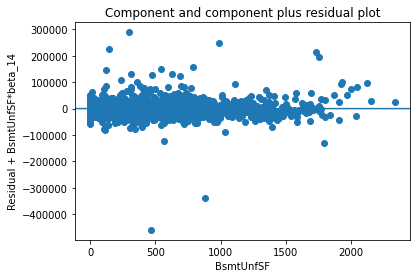

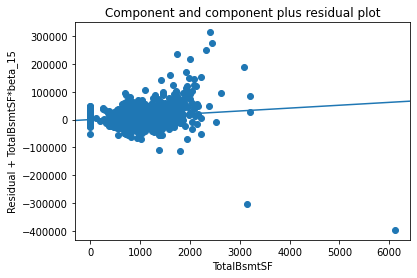

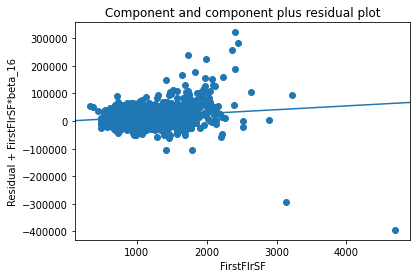

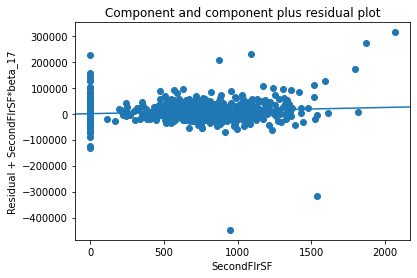

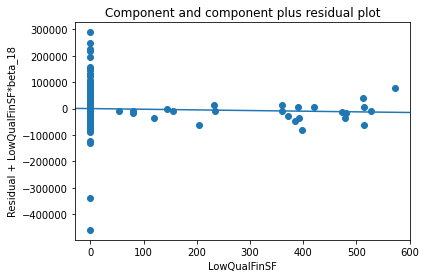

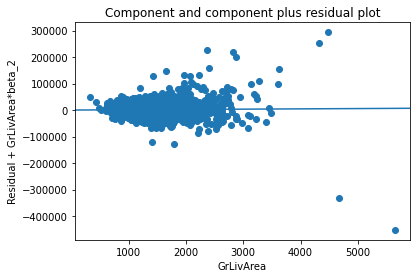

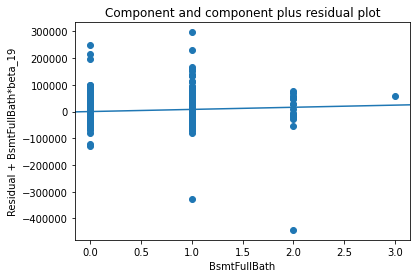

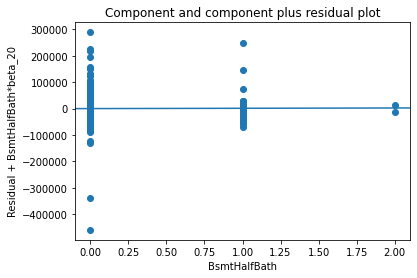

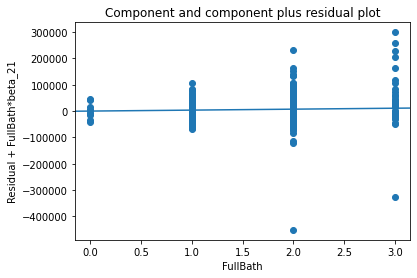

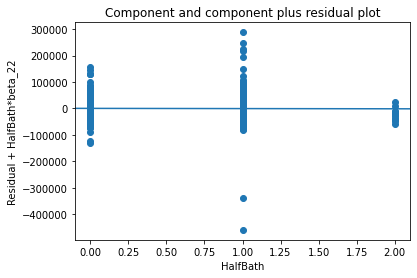

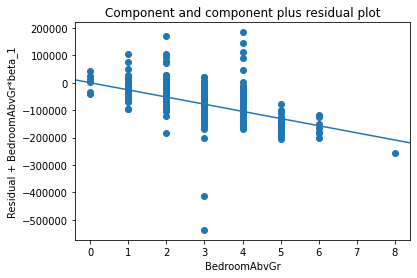

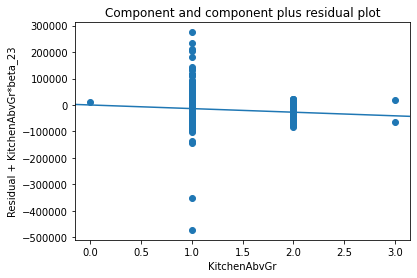

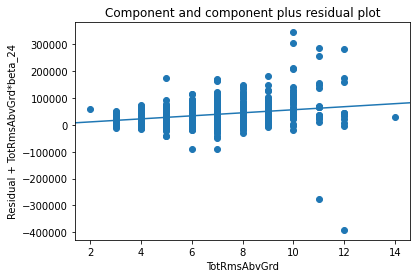

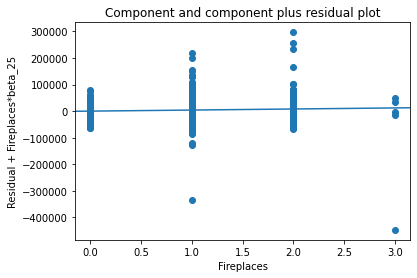

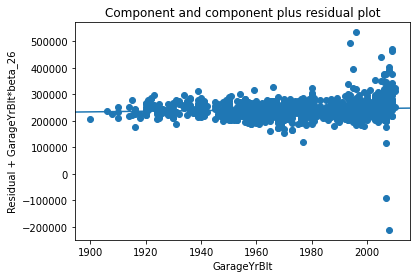

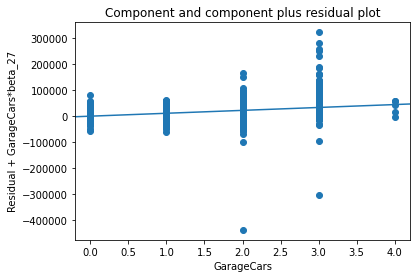

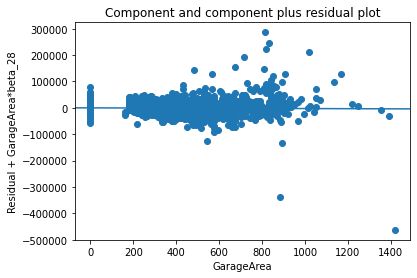

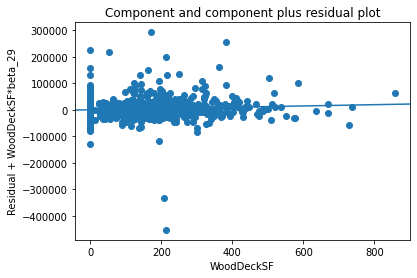

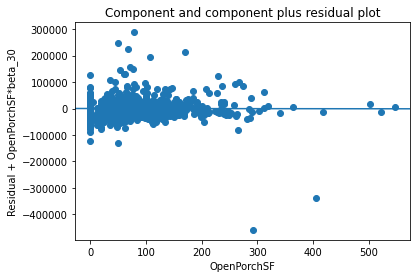

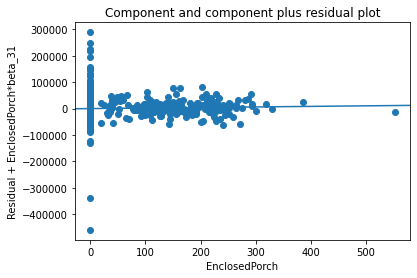

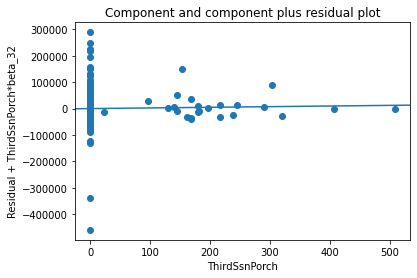

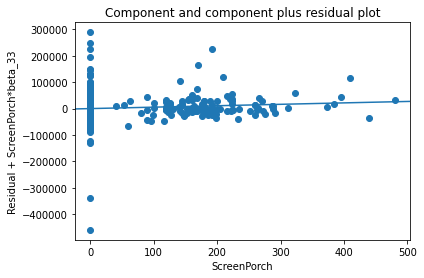

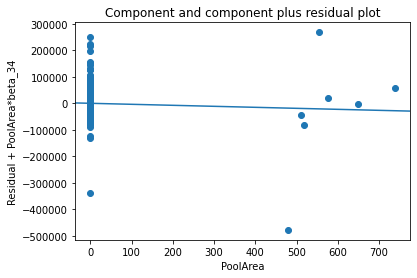

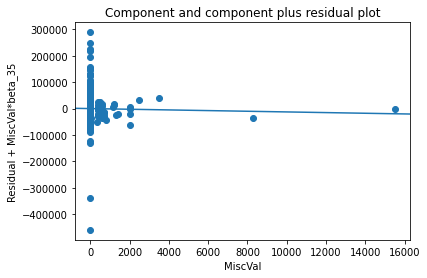

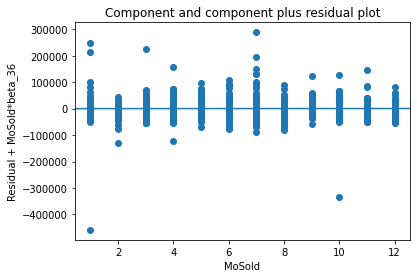

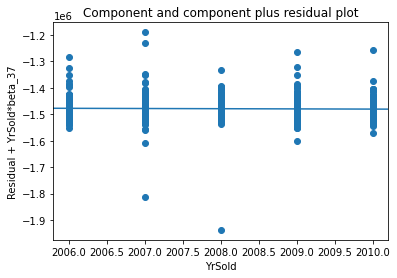

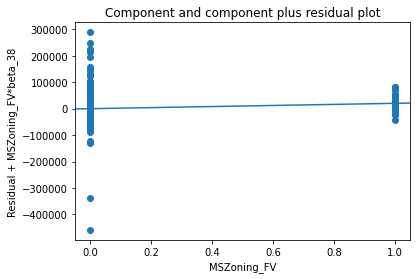

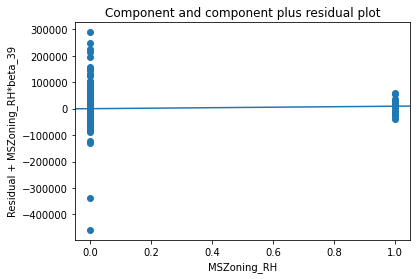

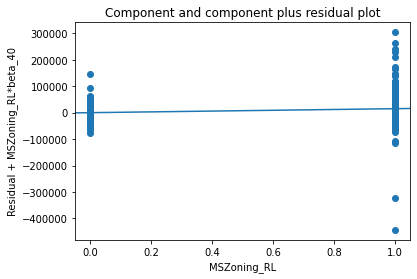

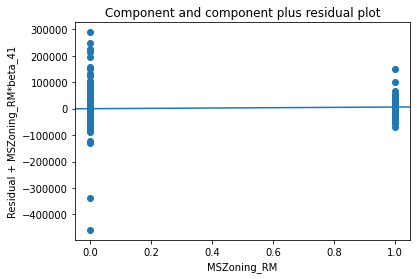

In [293]:
from statsmodels.graphics.regressionplots import plot_ccpr as ccpr

for i in train.drop(['SalePrice'], axis=1):
    ccpr(result, i)